In [1]:
import sys
sys.path.append('/home/xhding/workspaces/torch-deep-retina')
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from fnn.evaluation import *
from fnn.models import BNCNN_3D2_Stack_Old
from fnn.utils import select_model, get_data
from fnn.config import get_custom_cfg
from fnn.data import TestDataset, ValidationDataset
from fnn.notebook.utils import *
from torchdeepretina.utils import *
from torchdeepretina.intracellular import *
from torchdeepretina.visualizations import plot_filters
from torchdeepretina.datas import loadexpt

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda:0')

In [7]:
outputs = {}
idx_i = 500
idx_f = 600
cell = 0

In [8]:
cfg = get_custom_cfg('3d_conv2_stack')
#model = BNCNN_3D2_Stack_Old().to(device)
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack/epoch_017_loss_-4.04_pearson_0.6500_eval_loss_-4.13.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.sequential
ganglion.0.sequential.0
ganglion.0.sequential.1
ganglion.0.sequential.2
ganglion.0.sequential.3
ganglion.1
ganglion.2


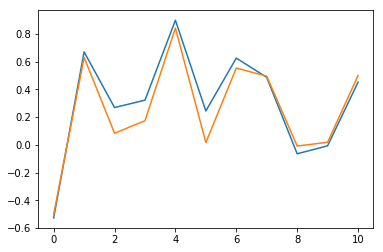

In [4]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack', 'ganglion.0.sequential.1.filter')

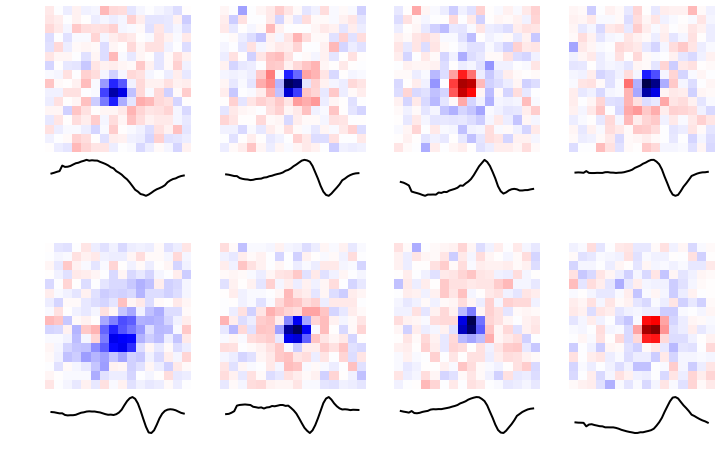

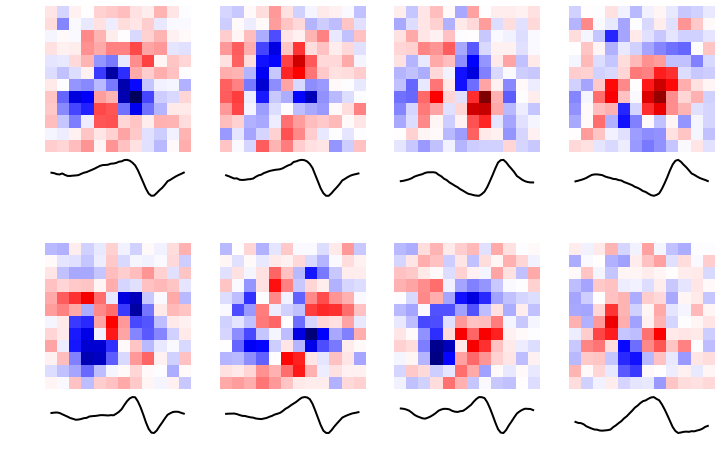

In [25]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

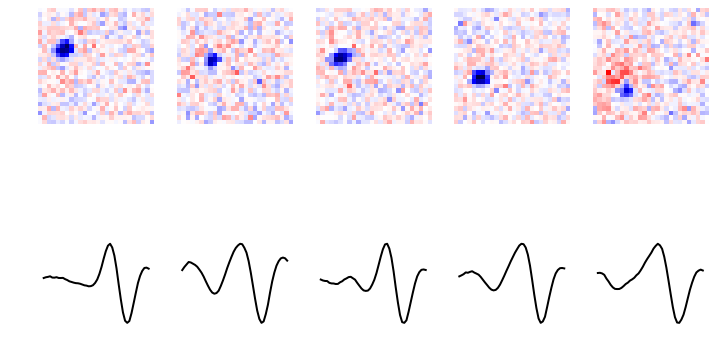

In [4]:
layers = ['ganglion.0']
stas = revcor_sta_ganglion(model, layers, 5, True, device)
fig = plot_filters(np.stack(stas['ganglion.0']), 26)

In [9]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
outputs['target'] = targ[idx_i:idx_f]
outputs['3d_conv2_stack'] = pred[idx_i:idx_f]
test_pc

0.7552007779494809

In [6]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc = pearsonr_batch_eval_cut_tail(model, test_data, 5, device)
test_pc

0.7440109707639339

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 't / frame')]

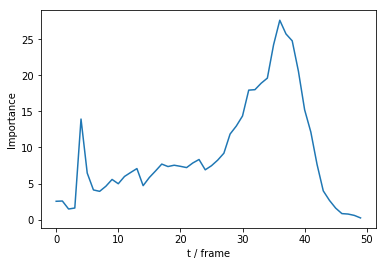

In [27]:
#noise = np.random.randn(1000,50,50)
#filter_size = model.image_shape[0]
#X = tdrstim.concat(noise, nh=filter_size)
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False)
fig, ax = plt.subplots()
ax.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))
ax.set(xlabel='t / frame', ylabel='Importance')

In [10]:
cfg = get_custom_cfg('bn_cnn_stack')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_030_loss_-2.77_pearson_0.6291_eval_loss_-29.18.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.0.convs
bipolar.0.convs.0
bipolar.0.convs.1
bipolar.0.convs.2
bipolar.0.convs.3
bipolar.0.convs.4
bipolar.0.convs.5
bipolar.0.convs.6
bipolar.1
bipolar.2
bipolar.3
bipolar.4
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.1
ganglion.2


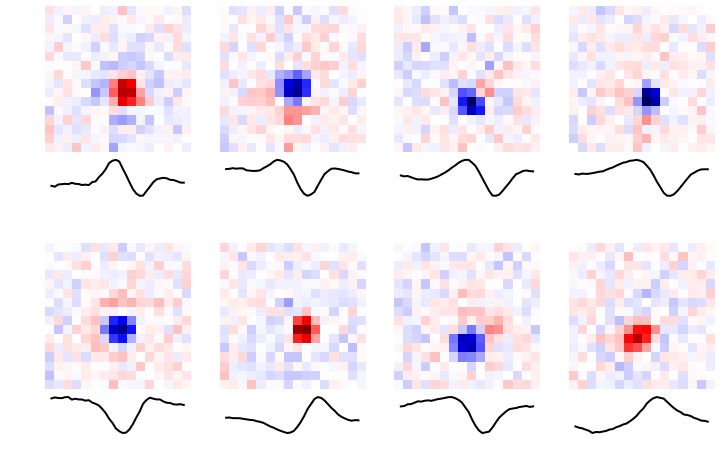

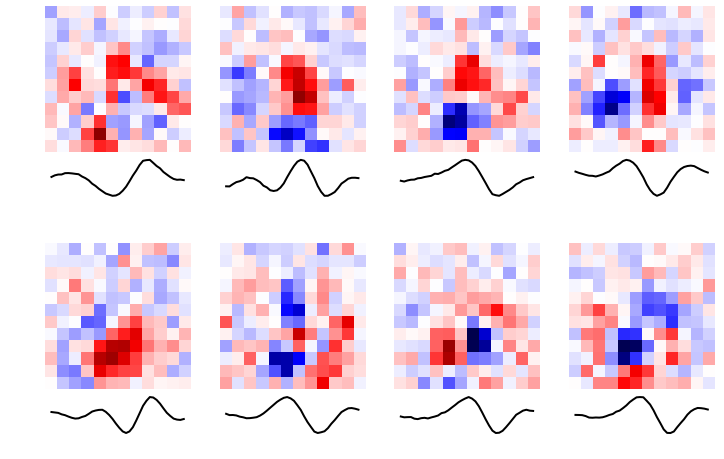

In [5]:
layers = ['bipolar.0', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans)
fig = plot_filters(np.stack(stas['bipolar.0']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [11]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
outputs['bn_cnn_stack'] = pred[idx_i:idx_f]
test_pc

0.7377298809810438

In [12]:
cfg = get_custom_cfg('3d_conv2_stack_double_filter')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack_double_filter/epoch_007_loss_-3.42_pearson_0.6138_eval_loss_-3.83.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.filter1
ganglion.0.filter1.sequential
ganglion.0.filter1.sequential.0
ganglion.0.filter1.sequential.1
ganglion.0.filter1.sequential.2
ganglion.0.filter1.sequential.3
ganglion.0.filter2
ganglion.0.filter2.sequential
ganglion.0.filter2.sequential.0
ganglion.0.filter2.sequential.1
ganglion.0.filter2.sequential.2
ganglion.0.filter2.sequential.3
ganglion.1
ganglion.2


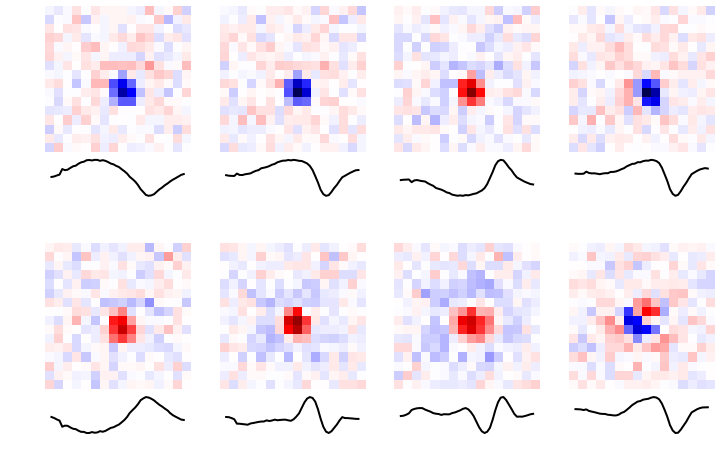

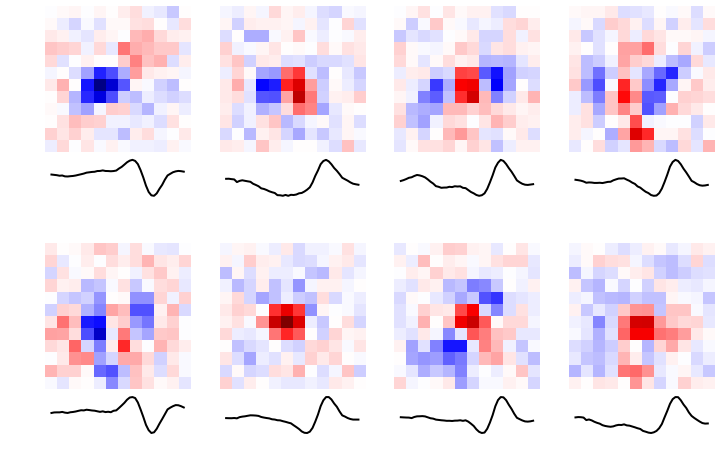

In [16]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [13]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
outputs['3d_conv2_stack_double_filter'] = pred[idx_i:idx_f]
test_pc

0.7518894072243723

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 't / frame')]

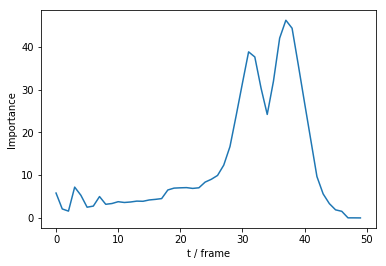

In [18]:
#noise = np.random.randn(1000,50,50)
#filter_size = model.image_shape[0]
#X = tdrstim.concat(noise, nh=filter_size)
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False, device=device)
fig, ax = plt.subplots()
ax.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))
ax.set(xlabel='t / frame', ylabel='Importance')

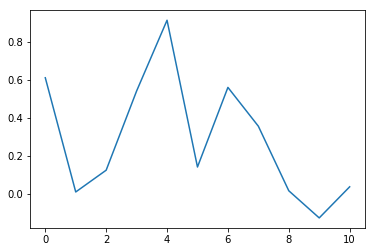

In [19]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_double_filter', 'ganglion.0.filter1.sequential.1.filter')

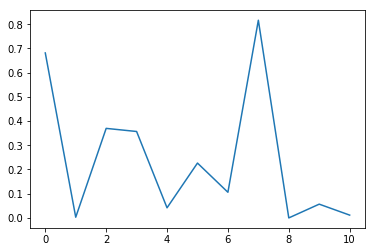

In [20]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_double_filter', 'ganglion.0.filter2.sequential.1.filter')

In [14]:
cfg = get_custom_cfg('3d_conv2_stack_triple_filter')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack_triple_filter/epoch_017_loss_-4.00_pearson_0.6379_eval_loss_-4.03.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.filter1
ganglion.0.filter1.sequential
ganglion.0.filter1.sequential.0
ganglion.0.filter1.sequential.1
ganglion.0.filter1.sequential.2
ganglion.0.filter1.sequential.3
ganglion.0.filter2
ganglion.0.filter2.sequential
ganglion.0.filter2.sequential.0
ganglion.0.filter2.sequential.1
ganglion.0.filter2.sequential.2
ganglion.0.filter2.sequential.3
ganglion.0.filter3
ganglion.0.filter3.sequential
ganglion.0.filter3.sequential.0
ganglion.0.filter3.sequential.1
ganglion.0.filter3.sequential.2
ganglion.0.filter3.sequential.3
ganglion.1
ganglion.2


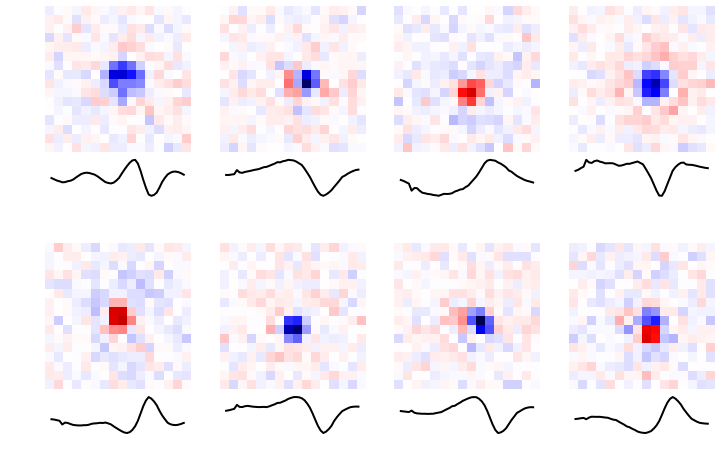

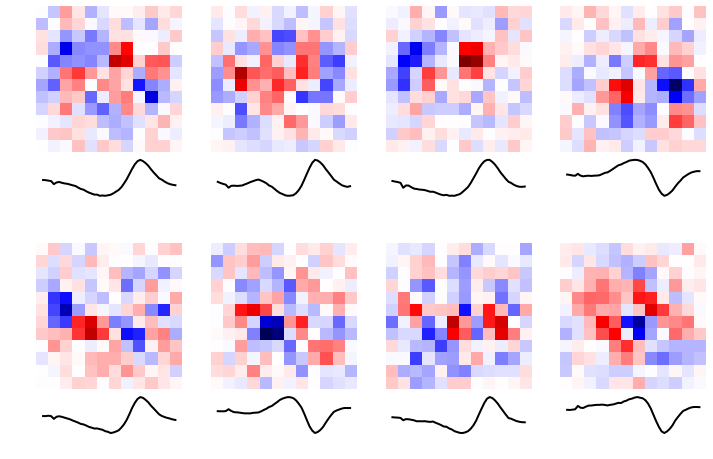

In [41]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

In [15]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
outputs['3d_conv2_stack_triple_filter'] = pred[idx_i:idx_f]
test_pc

0.7579865465960307

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 't / frame')]

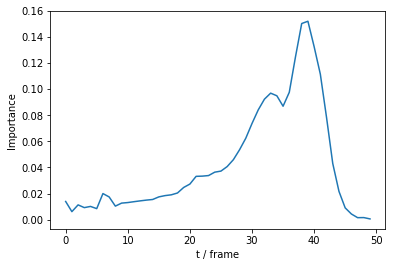

In [9]:
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False, device=device)
fig, ax = plt.subplots()
ax.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))
ax.set(xlabel='t / frame', ylabel='Importance')

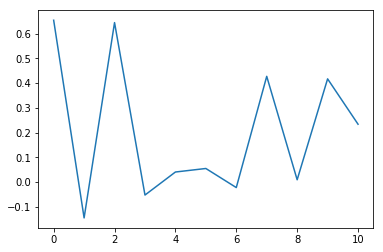

In [12]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_triple_filter', 'ganglion.0.filter1.sequential.1.filter')

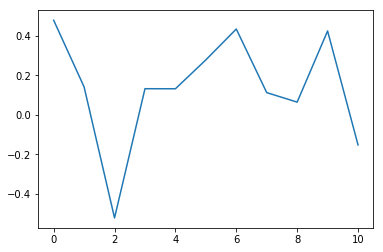

In [13]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_triple_filter', 'ganglion.0.filter2.sequential.1.filter')

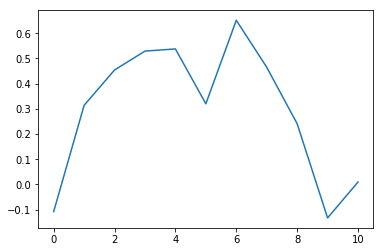

In [14]:
plot_temperal_filters('/home/xhding/saved_model/3d_conv2_stack_triple_filter', 'ganglion.0.filter3.sequential.1.filter')

In [16]:
cfg = get_custom_cfg('3d_conv2_stack_chan_filter')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack_channel_filter/epoch_010_loss_-3.85_pearson_0.5408_eval_loss_-1.85.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)

FileNotFoundError: [Errno 2] No such file or directory: '/home/xhding/saved_model/3d_conv2_stack_channel_filter/epoch_010_loss_-3.85_pearson_0.5408_eval_loss_-1.85.pth'

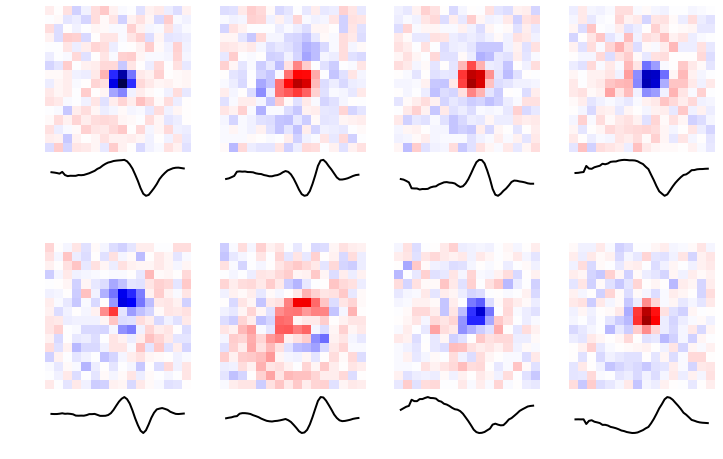

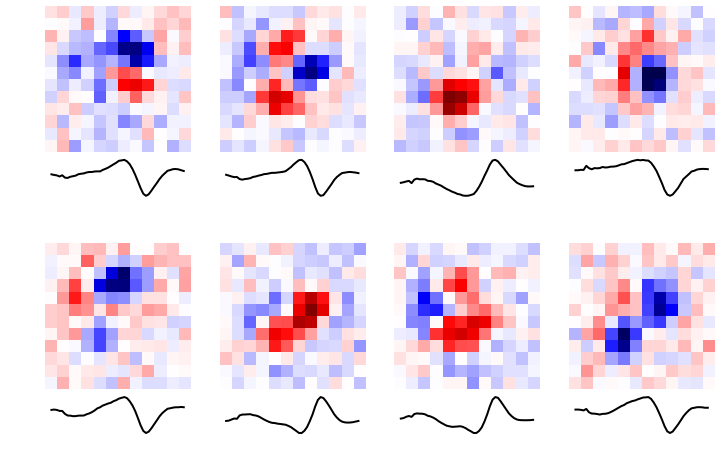

In [48]:
layers = ['bipolar.1', 'amacrine.1']
chans = [8, 8]
stas = revcor_sta(model, layers, chans, device)
fig = plot_filters(np.stack(stas['bipolar.1']), 15)
fig = plot_filters(np.stack(stas['amacrine.1']), 11)

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 't / frame')]

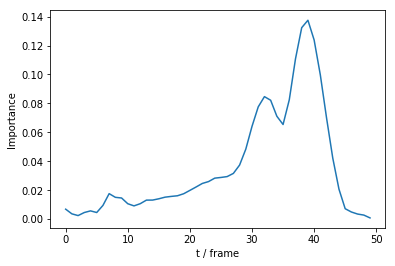

In [11]:
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'test',
                        cfg.img_shape[0], 0, data_path=cfg.Data.data_path)
X = data.X[0:1000]
intg_grad = stimulus_importance(model, X, alpha_steps=5, batch_size=500,
                    to_numpy=True, verbose=False, device=device)
fig, ax = plt.subplots()
ax.plot(np.arange(50), np.sqrt(np.square(intg_grad).mean(axis=(0,2,3))))
ax.set(xlabel='t / frame', ylabel='Importance')

In [50]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
outputs['3d_conv2_stack_channel_filter'] = pred[idx_i:idx_f]
test_pc

0.757752026915177

In [1]:
keys = ['3d_conv2_stack', 'bn_cnn_stack', 'target']
for key in keys:
    plt.plot(np.arange(0,idx_f-idx_i), outputs[key][:,cell], label=key)
    plt.legend()
plt.show()

NameError: name 'plt' is not defined

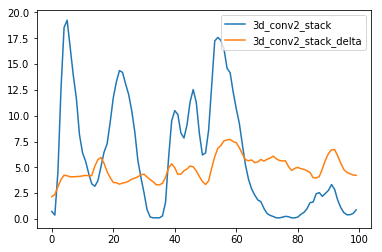

In [32]:
keys = ['3d_conv2_stack', '3d_conv2_stack_delta']
for key in keys:
    plt.plot(np.arange(0,idx_f-idx_i), outputs[key][:,cell], label=key)
    plt.legend()
plt.show()

In [30]:
cfg = get_custom_cfg('3d_conv2_stack')
#model = BNCNN_3D2_Stack_Old().to(device)
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack/epoch_007_loss_-3.45_pearson_0.6239_eval_loss_-3.65.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
delta_filter = torch.zeros(11,1,1)
delta_filter[10,0,0] = 1
checkpoint['model_state_dict']['ganglion.0.sequential.1.filter'].data = delta_filter.to(device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
for key, _ in model.named_modules():
    print(key)


bipolar
bipolar.0
bipolar.1
bipolar.1.convs
bipolar.1.convs.0
bipolar.1.convs.1
bipolar.1.convs.2
bipolar.1.convs.3
bipolar.1.convs.4
bipolar.1.convs.5
bipolar.1.convs.6
bipolar.2
bipolar.3
bipolar.4
bipolar.5
amacrine
amacrine.0
amacrine.1
amacrine.1.convs
amacrine.1.convs.0
amacrine.1.convs.1
amacrine.1.convs.2
amacrine.1.convs.3
amacrine.1.convs.4
amacrine.2
amacrine.3
amacrine.4
amacrine.5
ganglion
ganglion.0
ganglion.0.sequential
ganglion.0.sequential.0
ganglion.0.sequential.1
ganglion.0.sequential.2
ganglion.0.sequential.3
ganglion.1
ganglion.2


In [31]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 5, device, cfg)
outputs['3d_conv2_stack_delta'] = pred[idx_i:idx_f]
test_pc

0.3313244255481164

In [2]:
device = torch.device('cuda:3')
cfg = get_custom_cfg('bn_cnn_stack_nonorm')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack_NoNorm/epoch_045_loss_1.24_pearson_0.6025.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

BN_CNN_Stack_NoNorm(
  (bipolar): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(40, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (5): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (1): GaussianNoise(std=0.05, trainable=False, adapt=False, momentum=0.95)
    (2): ReLU()
  )
  (amacrine): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bi

In [2]:
device = torch.device('cuda:3')
cfg = get_custom_cfg('bn_cnn_stack_nonorm')
model = select_model(cfg, device)
#checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_030_loss_-2.77_pearson_0.6291_eval_loss_-29.18.pth'
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack_NoNorm/epoch_045_loss_1.24_pearson_0.6025.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

BN_CNN_Stack_NoNorm(
  (bipolar): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(40, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (5): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (1): GaussianNoise(std=0.05, trainable=False, adapt=False, momentum=0.95)
    (2): ReLU()
  )
  (amacrine): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bi

In [4]:
model.state_dict()['bipolar.0.convs.6.bias']

tensor([-0.9385, -0.2864, -0.4820, -0.1121, -0.5631, -0.0705, -0.5614,  0.1624],
       device='cuda:3')

In [3]:
import torchdeepretina.stimuli as stim

c0=0.05 
c1=0.35
duration=1000
delay=1000
nsamples=3000
filt_depth=40

envelope = stim.flash(duration, delay, nsamples, intensity=(c1 - c0))
envelope += c0

with torch.no_grad():
    x = np.random.randn(*envelope.shape) * envelope + 1
    x = (x - x.mean())/x.std()
    x = torch.from_numpy(stim.concat(x, nh=filt_depth)).to(device)
    resps = []
    after_bipolar = []
    for i in range(x.shape[0]):
        out = model.bipolar(x[i:i+1])
        after_bipolar.append(out.cpu().detach().numpy().squeeze())
        out = model.amacrine(out)
        out = model.ganglion(out)
        resps.append(out.cpu().detach().numpy().squeeze())

#after_bipolars = np.asarray(after_bipolar).mean((-1,-2))
after_bipolars = np.asarray(after_bipolar).reshape((2960,8,-1)).mean((-1))
responses = np.asarray(resps)

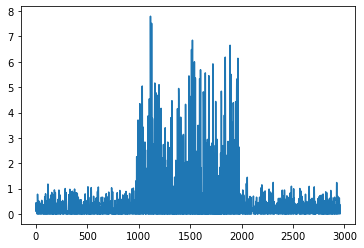

In [16]:
plt.plot(after_bipolars[:,7])

In [15]:
plt.plot(responses[:,7])

IndexError: index 7 is out of bounds for axis 1 with size 5

In [12]:
model.state_dict().keys()

odict_keys(['bipolar.0.convs.0.weight', 'bipolar.0.convs.1.weight', 'bipolar.0.convs.2.weight', 'bipolar.0.convs.3.weight', 'bipolar.0.convs.4.weight', 'bipolar.0.convs.5.weight', 'bipolar.0.convs.6.weight', 'bipolar.0.convs.6.bias', 'bipolar.1.sigma', 'amacrine.0.convs.0.weight', 'amacrine.0.convs.1.weight', 'amacrine.0.convs.2.weight', 'amacrine.0.convs.3.weight', 'amacrine.0.convs.4.weight', 'amacrine.0.convs.4.bias', 'amacrine.2.sigma', 'ganglion.0.weight'])

In [14]:
model.state_dict()['bipolar.0.convs.6.bias']

tensor([-0.9385, -0.2864, -0.4820, -0.1121, -0.5631, -0.0705, -0.5614,  0.1624],
       device='cuda:3')

In [21]:
from kinetic.utils import LinearStack
conv_weights = []
for i in range((15-1)//2):
    conv_weights.append(model.state_dict()['bipolar.0.convs.{}.weight'.format(i)].cpu().numpy())
bipolar_weight = LinearStack(conv_weights).sum(axis=(-1,-2))

In [22]:
bipolar_weight.shape

(8, 40)

In [24]:
conv_weights = []
for i in range((11-1)//2):
    conv_weights.append(model.state_dict()['amacrine.0.convs.{}.weight'.format(i)].cpu().numpy())
amacrine_weight = LinearStack(conv_weights).sum(axis=(-1,-2))

In [25]:
amacrine_weight.shape

(8, 8)

In [57]:
device = torch.device('cuda:0')
cfg = get_custom_cfg('bn_cnn_stack2')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_045_loss_-0.73_pearson_0.6079.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

BN_CNN_Stack(
  (bipolar): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(40, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (5): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (1): Flatten()
    (2): BatchNorm1d(10368, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
    (3): GaussianNoise(std=0.05, trainable=False, adapt=False, momentum=0.95)
    (4): ReLU()
  )
  (amacrine): Sequential(
    (0): Reshape(shape=(-1, 8, 36, 36))
    (1): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Seq

In [59]:
test_data = DataLoader(TestDataset(cfg), batch_size=512)
test_pc = pearsonr_eval_cell(model, test_data, 4, device)
test_pc, sum(test_pc)/4

([0.47267258806874407,
  0.4493793676574644,
  0.6763868245721965,
  0.35511225652433864],
 0.4883877592056859)

In [36]:
import torchdeepretina.stimuli as stim
with h5py.File('/home/xhding/tem_stim/20-09-03/fullfield_whitenoise.h5', 'r') as f:
    whitenoise_stim =  np.asarray(f['test']['stimulus']).astype('float32')
    target = f['test']['response']['firing_rate_10ms'][0]

In [37]:
x = whitenoise_stim[:]
x = (x - x.mean())/x.std()
x = torch.from_numpy(stim.concat(x, nh=40)).to(device)

In [52]:
model.eval()
with torch.no_grad():
    resps = []
    for i in range(x.shape[0]):
        resp = model(x[i:i+1])
        resps.append(resp)
    resp = torch.cat(resps, dim=0).cpu().detach().numpy()

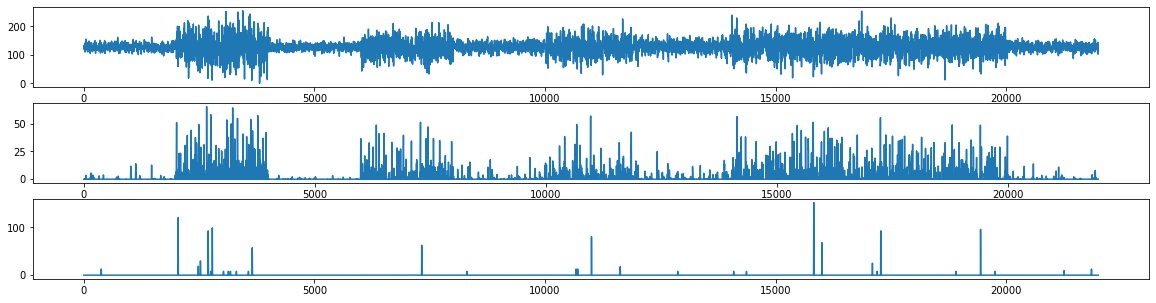

In [53]:
fig,ax = plt.subplots(3,1,figsize=(20,5))
ax[0].plot(whitenoise_stim[:,25,25])
ax[1].plot(resp[:, 0])
ax[2].plot(target)

In [2]:
f = h5py.File('/home/TRAIN_DATA/15-10-07/naturalscene.h5', 'r')

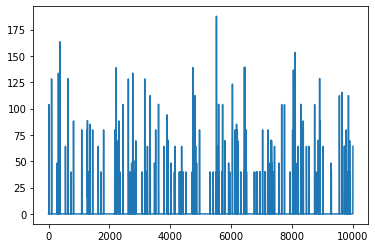

In [11]:
plt.plot(f['train']['response']['firing_rate_10ms'][0,:10000])

In [14]:
np.array(f['train']['response']['firing_rate_10ms']).mean()/np.array(f['train']['response']['binned']).mean()

99.90289865011113

In [19]:
import torchdeepretina.stimuli as stim
with h5py.File('/home/xhding/tem_stim/20-09-03/naturalscene.h5', 'r') as f:
    response = np.array(f['test']['response']['firing_rate_10ms'])

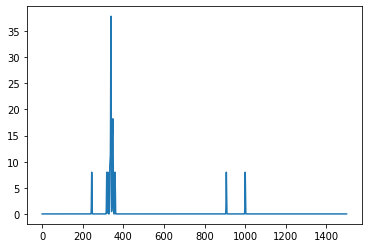

In [26]:
plt.plot(response[5, :1500])